In [14]:
import sys
import numpy as np
import matplotlib
matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tifffile import imread
from csbdeep.utils import Path, normalize
from csbdeep.io import save_tiff_imagej_compatible

from stardist import random_label_cmap, _draw_polygons, export_imagej_rois
from stardist.models import StarDist2D

import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage.measure import regionprops, label

np.random.seed(6)
lbl_cmap = random_label_cmap()

In [15]:
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [16]:
X = sorted(glob(r'C:\Users\jv92c\Documents\mFISH\sample_data\test_images\*.tif'))
X = list(map(imread,X))

n_channel = 1 if X[0].ndim == 2 else X[0].shape[-1]
axis_norm = (0,1)   # normalize channels independently
# axis_norm = (0,1,2) # normalize channels jointly
if n_channel > 1:
    print("Normalizing image channels %s." % ('jointly' if axis_norm is None or 2 in axis_norm else 'independently'))

In [17]:
if False:
    fig, ax = plt.subplots(7,8, figsize=(16,16))
    for i,(a,x) in enumerate(zip(ax.flat, X)):
        a.imshow(x if x.ndim==2 else x[...,0], cmap='gray')
        a.set_title(i)
    [a.axis('off') for a in ax.flat]
    plt.tight_layout()
None;

In [18]:
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [20]:
img = normalize(X[2], 1,99.8, axis=axis_norm)
labels, details = model.predict_instances(img)

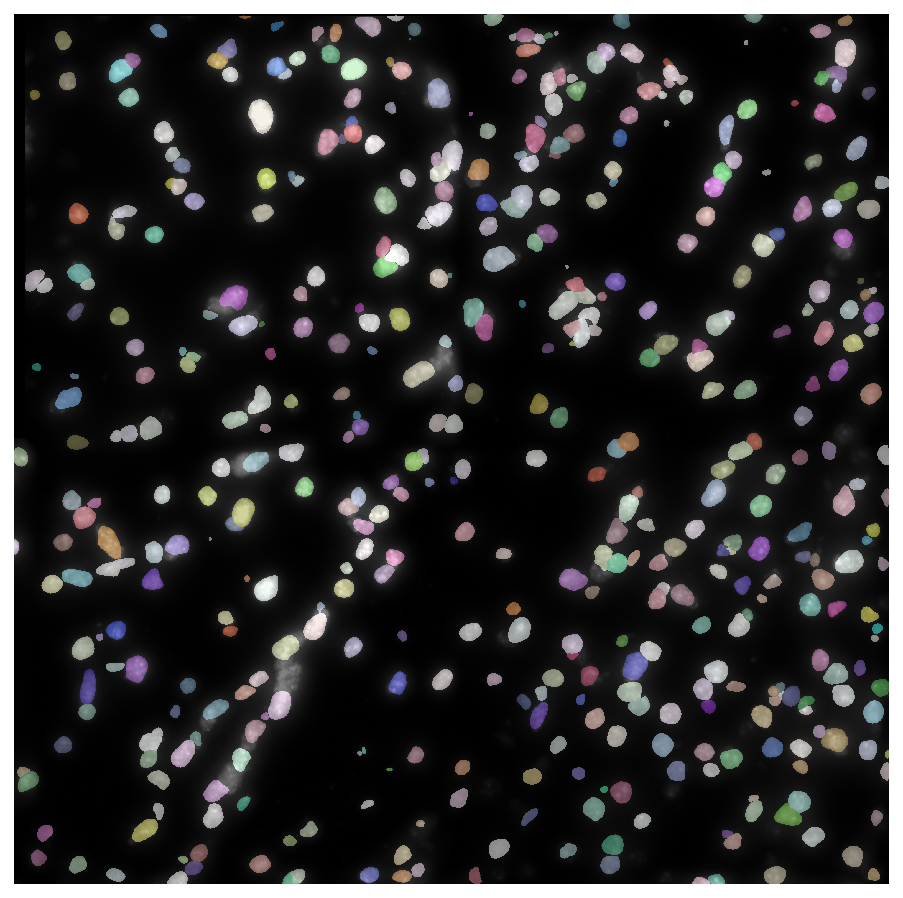

In [21]:
plt.figure(figsize=(8,8))
plt.imshow(img if img.ndim==2 else img[...,0], clim=(0,1), cmap='gray')
plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
plt.axis('off');

In [ ]:
label = label()

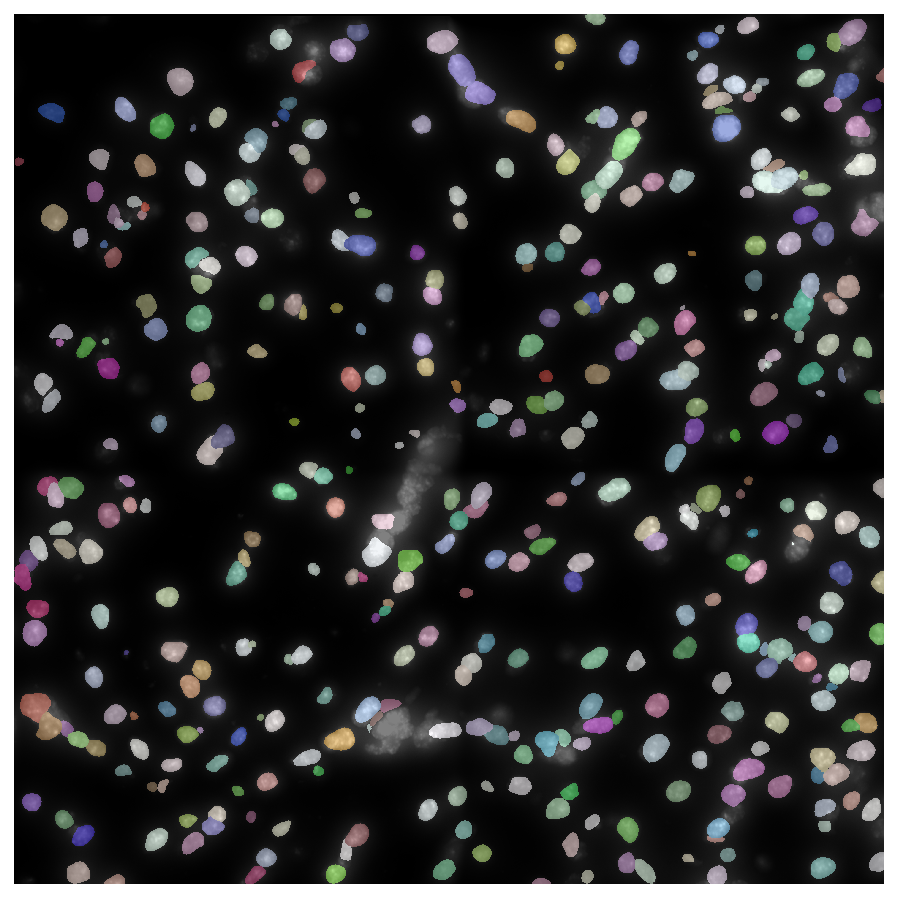

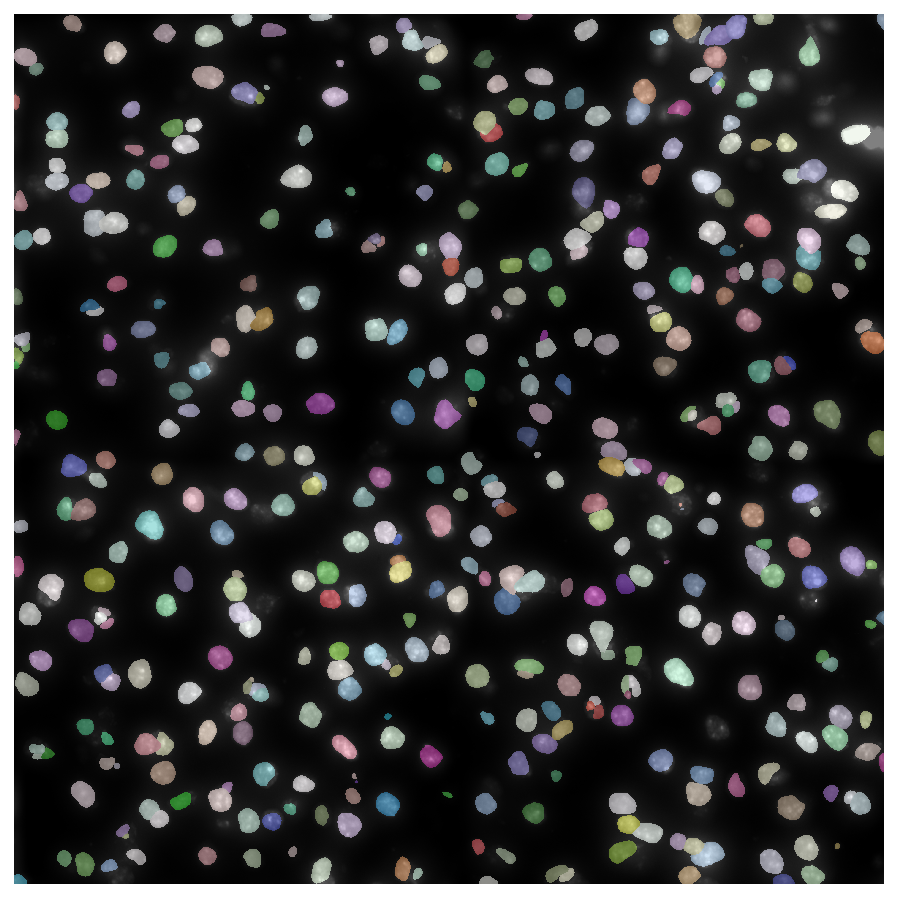

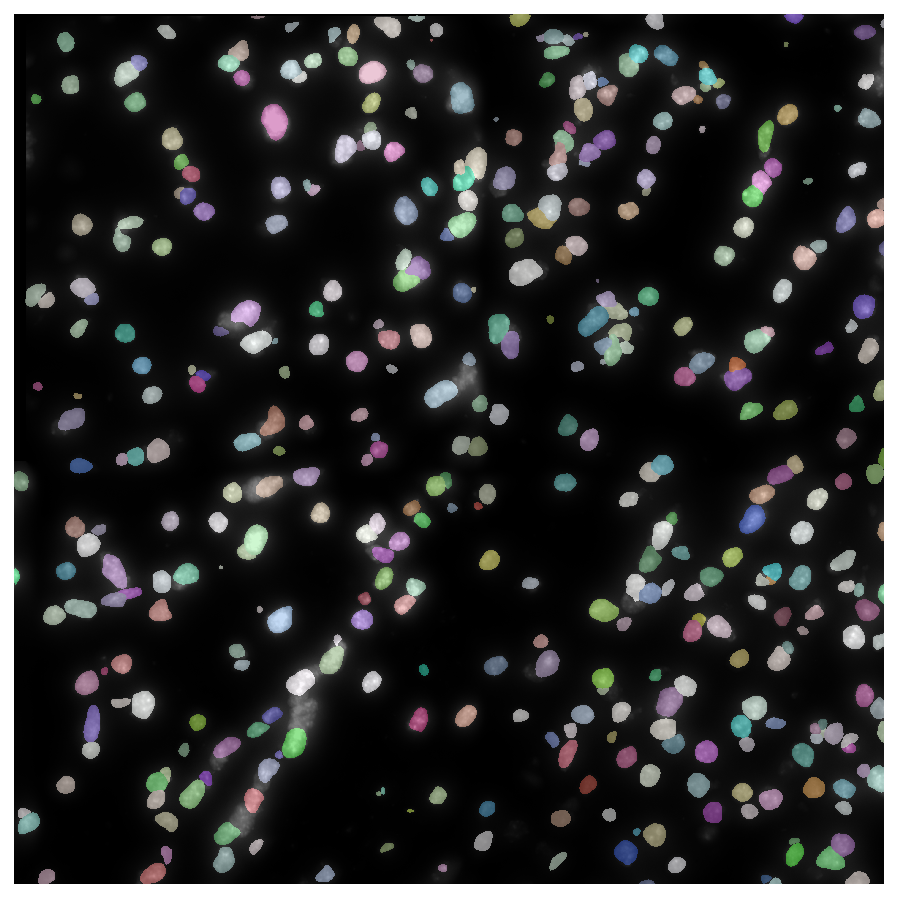

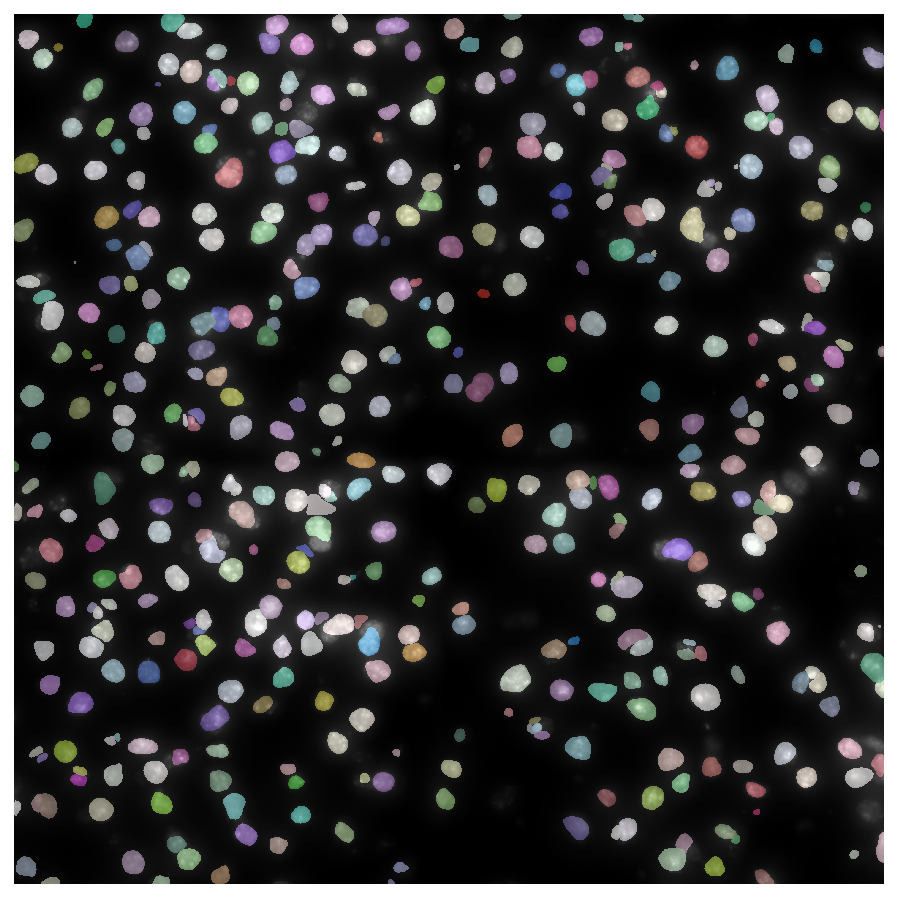

In [22]:
for i in range(len(X)):
    img = normalize(X[i][0:3800, 0:3800], 1,99.8, axis=axis_norm)
    labels, details = model.predict_instances(img)
    
    plt.figure(figsize=(8,8))
    plt.imshow(img if img.ndim==2 else img[...,0], clim=(0,1), cmap='gray')
    plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
    plt.axis('off');


plt.show()

In [1]:
#find a way to iterate through labeled objects, or even directly integrate it into regionprops.

In [ ]:
for i in range(len(X)):
    img = normalize(X[i][0:3800, 0:3800], 1,99.8, axis=axis_norm)
    
    img_gaussian_mask = filters.gaussian(img, sigma=150, output=None, mode='nearest', cval=0, 
                                         multichannel=None, preserve_range=False, truncate=4.0)
    
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    #plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
    plt.axis('off');


plt.show()